# Ejercicio: Clasificación de Prendas con Fashion
**Práctica Deep Learning - Bootcamp DS MLops - Nov 2025**

En este ejercicio aplicaremos lo aprendido con MNIST para clasificar prendas de vestir usando el dataset Fashion.

## 1) Importar Librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow version: {tf.__version__}")

2025-11-24 09:40:12.364181: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-24 09:40:12.380824: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.17.0


## 2) Cargar el Dataset Fashion MNIST

In [2]:
# Cargar datos
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Nombres de las clases
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín']

print(f"Datos de entrenamiento: {x_train.shape}")
print(f"Etiquetas de entrenamiento: {y_train.shape}")
print(f"Datos de prueba: {x_test.shape}")
print(f"Etiquetas de prueba: {y_test.shape}")

Datos de entrenamiento: (60000, 28, 28)
Etiquetas de entrenamiento: (60000,)
Datos de prueba: (10000, 28, 28)
Etiquetas de prueba: (10000,)


## 3) Visualizar Ejemplos del Dataset

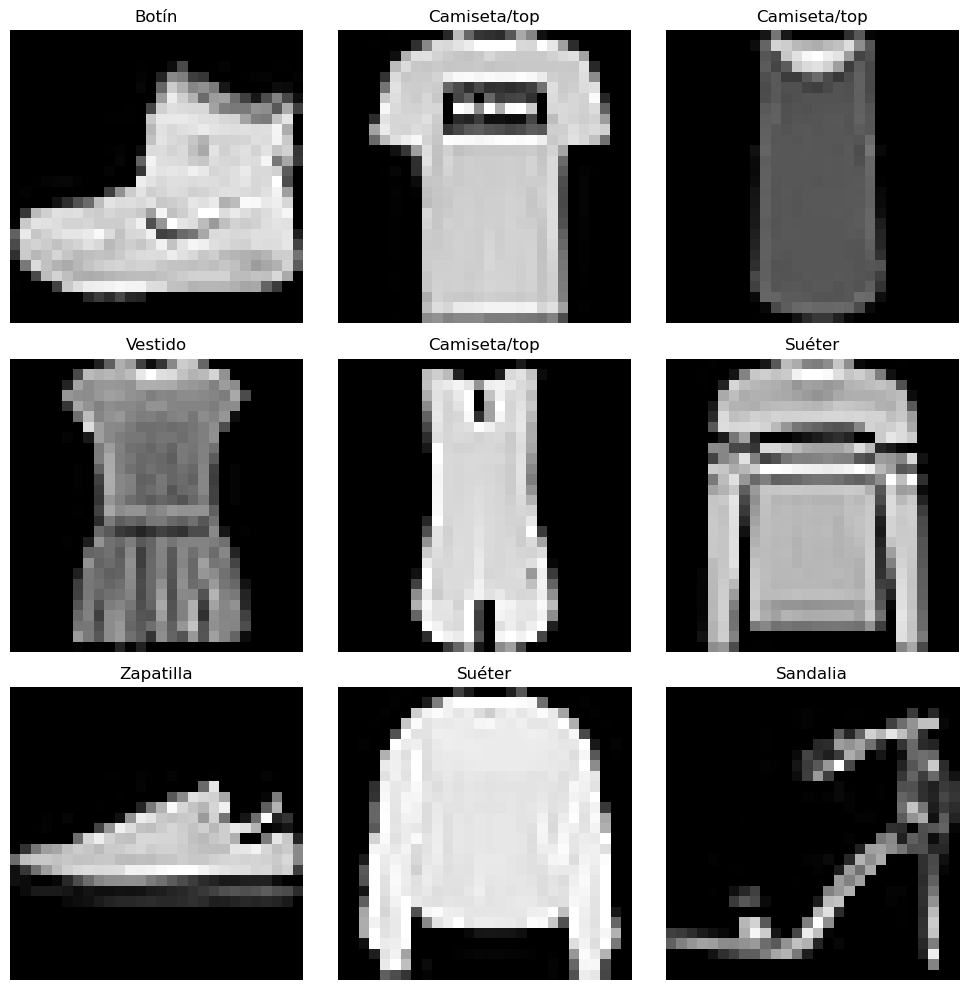

In [3]:
# Visualizar las primeras 9 imágenes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'{class_names[y_train[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## 4) Crear el Modelo de Red Neuronal

In [4]:
# Crear el modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convierte 28x28 en vector de 784
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    keras.layers.Dense(128, activation='relu'),   
    keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 clases
])

# Mostrar resumen del modelo
model.summary()

/home/maria/miniconda3/envs/zgames/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

## 5) Compilar el Modelo

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("✓ Modelo compilado")

✓ Modelo compilado


## 6) Entrenar el Modelo

In [6]:
# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7040 - loss: 8.2769 - val_accuracy: 0.7694 - val_loss: 0.8686
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7848 - loss: 0.7684 - val_accuracy: 0.8069 - val_loss: 0.7210
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8051 - loss: 0.6009 - val_accuracy: 0.8108 - val_loss: 0.5757
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8210 - loss: 0.5299 - val_accuracy: 0.8002 - val_loss: 0.5993
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8249 - loss: 0.5113 - val_accuracy: 0.8218 - val_loss: 0.5788
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8269 - loss: 0.5161 - val_accuracy: 0.8227 - val_loss: 0.5297
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8398 - loss: 0.4725 - val_accuracy: 0.8307 - val_loss: 0.5358
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8432 - loss: 0.4519 - val_accuracy: 0.

## 7) Visualizar Curvas de Entrenamiento

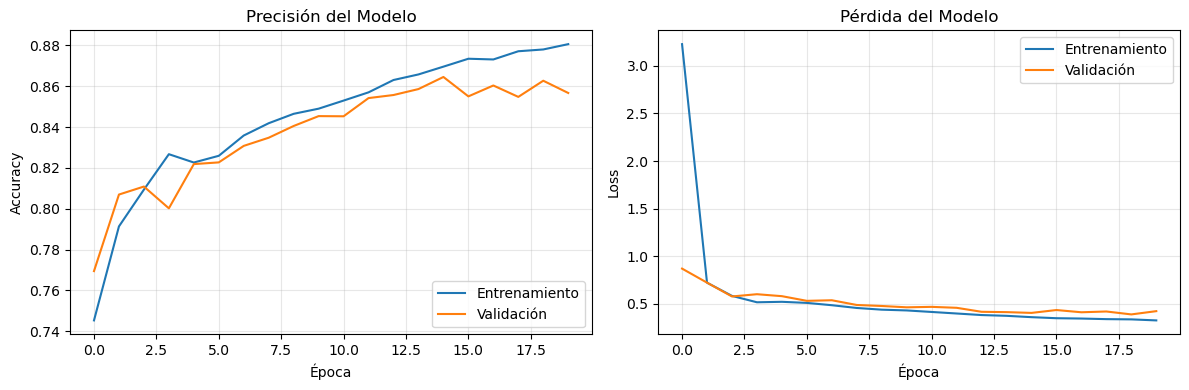

In [7]:
# Graficar accuracy y loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy
ax1.plot(history.history['accuracy'], label='Entrenamiento')
ax1.plot(history.history['val_accuracy'], label='Validación')
ax1.set_title('Precisión del Modelo')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Época')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Loss
ax2.plot(history.history['loss'], label='Entrenamiento')
ax2.plot(history.history['val_loss'], label='Validación')
ax2.set_title('Pérdida del Modelo')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Época')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8) Evaluar el Modelo

In [8]:
# Evaluar en datos de prueba
results = model.evaluate(x_test, y_test, batch_size=64)

print(f"\nResultados en datos de prueba:")
print(f"  Loss (pérdida): {results[0]:.4f}")
print(f"  Accuracy (precisión): {results[1]:.4f} ({results[1]*100:.2f}%)")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8480 - loss: 0.4376

Resultados en datos de prueba:
  Loss (pérdida): 0.4412
  Accuracy (precisión): 0.8457 (84.57%)


## 9) Realizar Predicciones

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


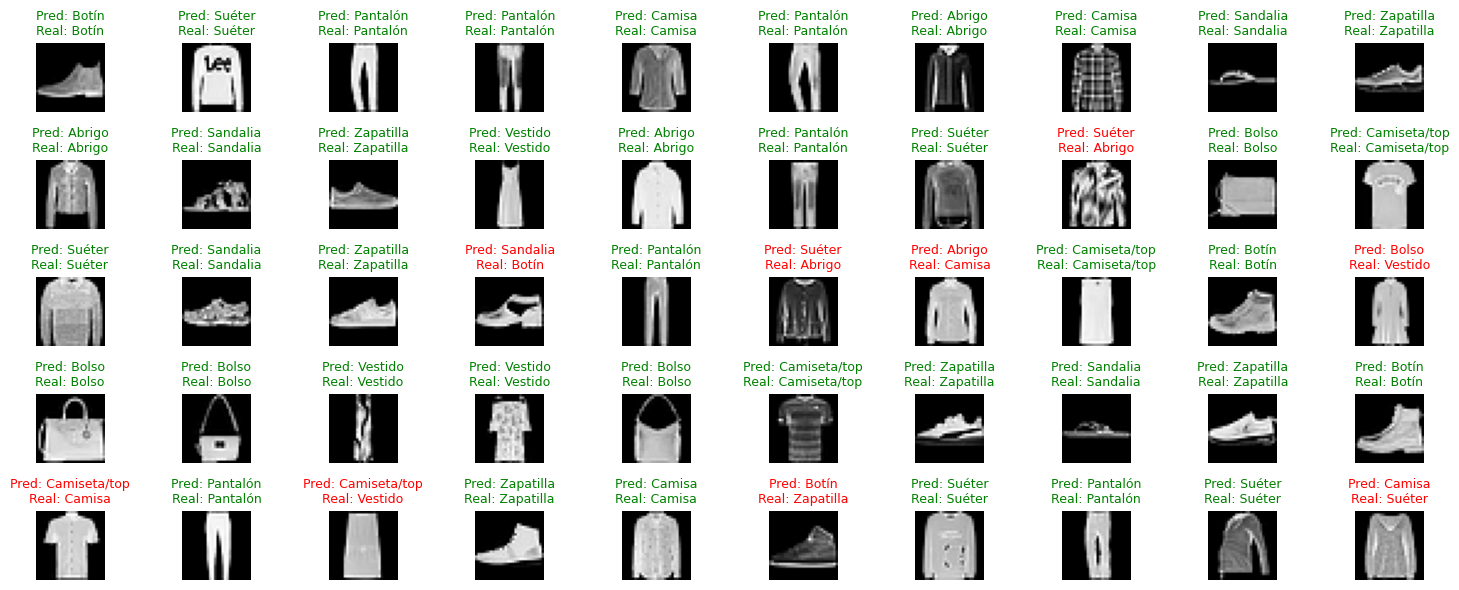

In [9]:
# Predecir las primeras 50 imágenes del conjunto de prueba
num_predictions = 50
predictions = model.predict(x_test[:num_predictions])

# Visualizar predicciones
fig, axes = plt.subplots(5, 10, figsize=(15, 6))
axes = axes.ravel()

for i in range(num_predictions):
    axes[i].imshow(x_test[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    
    # Color verde si es correcto, rojo si es incorrecto
    color = 'green' if predicted_label == true_label else 'red'
    
    axes[i].set_title(
        f'Pred: {class_names[predicted_label]}\n'
        f'Real: {class_names[true_label]}',
        color=color,
        fontsize=9
    )
    axes[i].axis('off')

plt.tight_layout()
plt.show()